In [1]:
import sys
print('sys')
sys.path.append("C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages")
# sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path
import os
print('os')
import numpy as np
import tensorflow as tf
print('tensorflow :',tf.__version__)
# from sklearn.metrics import confusion_matrix

from config import *
from utils.util import *
from model import *
from utils.tfrecord_util import parse_tfrecord
from iterator import batch_iterator

sys
os
tensorflow : 1.13.1


In [2]:
opts = TrainOption('cls')

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    BATCH_SIZE = 1
    tfrecode=TEST_FILE
    print(f"test data from : {tfrecode}")
    iterator = batch_iterator(tfrecode , batch_size=1
                                    , training=False, shuffle=False, parser=parse_tfrecord
                                    , buffer_size=SHUFFLE_BUFFER)
    images_batch, labels_batch = iterator.get_next()
    with open(tfrecode.split('.')[0] + '.length', 'r') as f:
        data_lenth = int(f.read())
    
    nstep = int(data_lenth/BATCH_SIZE)
    
    sess.run(iterator.initializer)
    n_imgs = np.zeros((1,) + OPTIC_DISC_SHAPE)
    g_imgs = np.zeros((1,) + OPTIC_DISC_SHAPE)
    y_true = np.array({})
    pr=progress()
    i=0
    while i < nstep:
        images, labels = sess.run([images_batch, labels_batch])
        y_true = np.append(y_true,labels)
        
#         if labels == 0:
#             n_imgs = np.vstack([n_imgs, images])
#         else:
        g_imgs = np.vstack([g_imgs, images])
        
        pr.print_progress(BATCH_SIZE,data_lenth,i)
        i+=1
    
    y_true = y_true[1:]
    g_imgs = g_imgs[1:]
    n_imgs = n_imgs[1:]

test data from : D:\Projects\my_Glaucoma_project\dataset\Glaucoma\test.tfrecord


NameError: name 'batch_iterator' is not defined

In [5]:
import collections
print(collections.Counter(y_true))

Counter({0: 360, 1: 40})


In [6]:
n_imgs.shape

(0, 256, 256, 3)

0


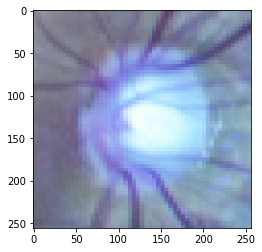

In [7]:
idx = 25
print(y_true[idx])
plt.imshow(g_imgs[idx])

In [12]:
# plt.imshow(n_imgs[146])

# test 

In [49]:
import os
import sys
import tensorflow as tf
sys.path.append("C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages")
# sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"]+sys.path
from skimage.transform import rescale, resize, downscale_local_mean
from config import *

In [50]:
def resize_img(img,shape):
    img = cv2.resize(img, dsize=shape, interpolation=cv2.INTER_AREA)
    return img

In [51]:
g0021 = 'D:\Projects\my_Glaucoma_project\dataset\Glaucoma\Training400\Glaucoma\g0022.jpg'
m0021 = 'D:\Projects\my_Glaucoma_project\dataset\Glaucoma\mask_od\mask_g0022.jpg'

In [52]:
def crop_optic_disk(image, mk,margin = 3):
    bbox = tf.where(tf.math.greater(mk,0))
    bbox_max = tf.math.reduce_max(bbox,axis =0)
    bbox_min = tf.math.reduce_min(bbox,axis =0)
    hmax, wmax = tf.cast(bbox_max[1],'int32'), tf.cast(bbox_max[2],'int32')
    hmin, wmin = tf.cast(bbox_min[1],'int32'), tf.cast(bbox_min[2],'int32')
    
    hmax = tf.cast(tf.math.minimum(tf.add(hmax,margin), 512),'int32')
    wmax = tf.cast(tf.math.minimum(tf.add(wmax,margin), 512),'int32')
# #     print(tf.cast(wmax,'int32'))
    
    hmin = tf.cast(tf.math.maximum(tf.subtract(hmin,margin), 0),'int32')
    wmin = tf.cast(tf.math.maximum(tf.subtract(wmin,margin), 0),'int32')
# #     print(hmin.eval(session=s), wmin, hmax, wmax)
    hmax, wmax = tf.subtract(hmax, hmin), tf.subtract(wmax, wmin)
#     tf.image.crop_to_bounding_box(image, hmin, wmin, hmax, wmax)
    return tf.image.crop_to_bounding_box(image, hmin, wmin, hmax, wmax)
# hmin, wmin, hmax, wmax

In [53]:
# margin = 100
# print(np.min(np.where(mk>0)[1])-margin," : ", np.max(np.where(mk>0)[1])+margin)
# print((np.max(np.where(mk>0)[1])+margin) - (np.min(np.where(mk>0)[1])-margin) )

# print(np.min(np.where(mk>0)[2])-margin," : ", np.max(np.where(mk>0)[2])+margin)
# print(np.max(np.where(mk>0)[2])+margin - np.min(np.where(mk>0)[2])-margin)


[None, 512, 512, 3]


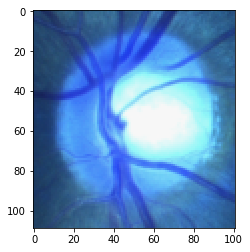

In [54]:
mk = cv2.imread(m0021, cv2.IMREAD_COLOR)
mk = resize_img(mk,IMAGE_SHAPE[:2])
mk = mk[np.newaxis,:]

img = cv2.imread(g0021, cv2.IMREAD_COLOR)
img = resize_img(img,IMAGE_SHAPE[:2])
img = img[np.newaxis,:]

shapes = list((None,)+IMAGE_SHAPE)
print(shapes)
mask = tf.placeholder('float32', shape=shapes, name='mask')  
images = tf.placeholder('float32', shape=shapes, name='images')  
optic_disk = crop_optic_disk(images,mask,margin=3)
with tf.Session() as sess:
#     optic_disk = crop_mask(images,mask,sess,10000)
    opic = sess.run( [optic_disk], feed_dict={mask: mk, images : img})
#     print(opic)
    opic = opic[0][0].astype(np.int)
    plt.imshow(opic)

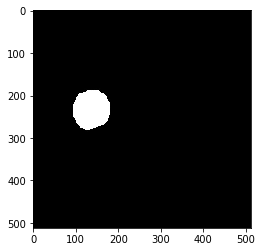

In [24]:
plt.imshow(mk[0])

In [28]:
max(opic[0][0][:,2])

183

In [26]:
opic[0][1]

array([  0, 287, 183,   2], dtype=int64)

In [29]:
opic[0][2]

array([  0, 184,  88,   0], dtype=int64)

In [ ]:
181, 85, 290, 186
184-3, 88-3, 287+3, 183+3

181, 85, 109 ,101

# normalize test

In [9]:
import os
import sys
import tensorflow as tf
sys.path.append("C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages")
# sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"]+sys.path
from skimage.transform import rescale, resize, downscale_local_mean
# from config import *

In [48]:
from PIL import Image

In [3]:
g0021 = 'D:\Projects\my_Glaucoma_project\dataset\Glaucoma\Training400\Glaucoma\g0021.jpg'

In [10]:


def normalize_img(img):
    shape = img.shape
    img = np.float64(img.reshape(-1))
    img -= img.mean()
    img /= img.std()
    img = img.reshape(shape)
#     img = tf.image.per_image_standardization(img)
#     img = img/ 255
    return img

def normalize_img2(img):
    img.astype(float)
    img = img/ 255
    return img

def c_norm(img):
    img = img.astype(float)
    for i in range(3):
        ch = img[:,:,i] - img[:,:,i].mean()
        ch = ch /img[:,:,i].std()
        img[:,:,i] = ch
    return img

def resize_img(img,shape):
    img = resize(img,shape)
    return img

In [71]:
image = cv2.imread(g0021, cv2.IMREAD_COLOR)
IMAGE_SHAPE = (299, 299,3)
image_shape = IMAGE_SHAPE[:2]
image = cv2.resize(image, dsize=image_shape, interpolation=cv2.INTER_AREA)

# image = resize_img(image,IMAGE_SHAPE)

In [60]:
image = np.log(image+1)

In [62]:
image = normalize_img(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


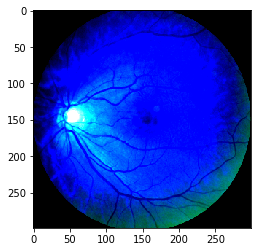

In [63]:
plt.imshow(image)

In [28]:
# image.flatten()

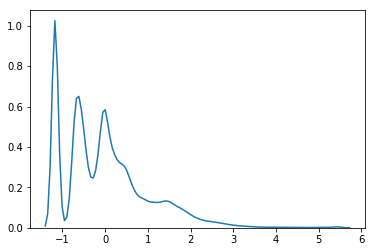

In [64]:
sns.kdeplot(image.flatten())

In [8]:
image.flatten()

0.996078431372549

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


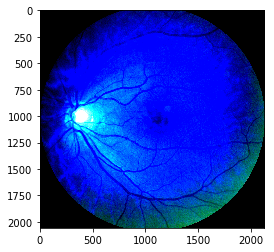

In [130]:
plt.imshow(normalize_img(image))

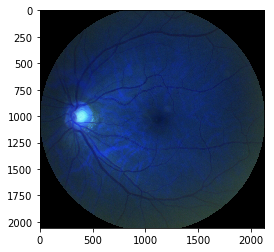

In [131]:
plt.imshow(normalize_img2(image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


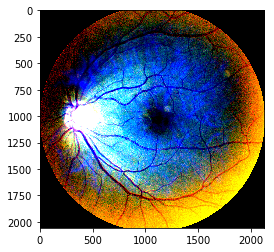

In [115]:
plt.imshow(c_norm(image))

In [66]:
from skimage import data
from skimage.transform import resize
image = data.camera()
resize(image, (100, 100))

array([[0.61176471, 0.61176471, 0.61568627, ..., 0.60392157, 0.59678431,
        0.59215686],
       [0.60717961, 0.61176471, 0.61105882, ..., 0.59929412, 0.5920298 ,
        0.59215686],
       [0.60399216, 0.60784314, 0.60427451, ..., 0.58741176, 0.57647059,
        0.58431373],
       ...,
       [0.47129412, 0.47178824, 0.4587451 , ..., 0.46627451, 0.45945098,
        0.41694118],
       [0.45003922, 0.43419608, 0.47654902, ..., 0.40342745, 0.41871529,
        0.44352941],
       [0.49041725, 0.49435294, 0.56493333, ..., 0.43678431, 0.49729098,
        0.47913725]])

In [67]:
image

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)